In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

In [5]:
img = cv.imread('pic/wolf500x750.jpg', 0)
equ = cv.equalizeHist(img)

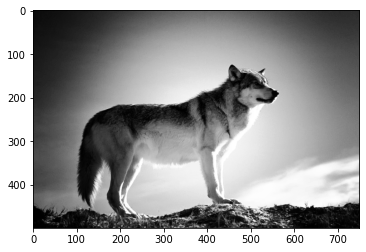

In [35]:
img = cv.imread('pic/wolf500x750.jpg', 0)
L = 256

h = cv.calcHist([img], [0], None, [256], [0, 256])
f = h / h.sum()
a = np.cumsum(f)
s = np.round(freq * (L-1)).astype(np.uint8)

equ = s[img]

show(equ)

In [28]:
%%time

equ  = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        equ[i,j] = s[img[i,j]]

Wall time: 506 ms


In [33]:
%%time

equ = s[img]

Wall time: 5.64 ms


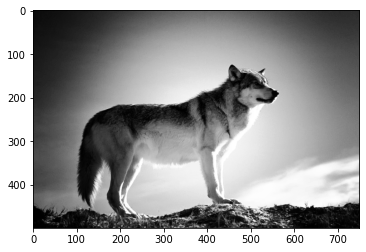

In [34]:
show(equ)

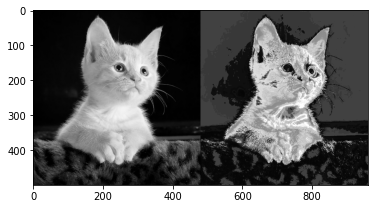

In [90]:
whole = cv.imread("pic/cat500x480.jpg", 0)
part = whole[100:300, 150:350]

gamma = 4
hist = cv.calcHist([part], [0], None, [256//gamma], [0, 256])
cv.normalize(hist, hist, 0, 255, cv.NORM_MINMAX)

bp = cv.calcBackProject([whole], [0], hist, [0, 256], 1)
show(np.hstack([whole, bp]))

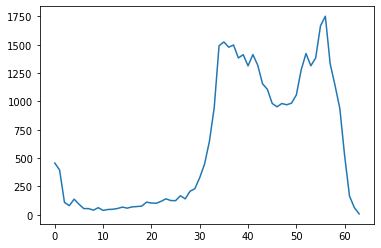

In [60]:
hist = cv.calcHist([part], [0], None, [64], [0, 256])

plt.plot(hist)
plt.show()

In [1]:
whole = cv.imread("pic/cat500x480.jpg", 0)
part = whole[100:300, 150:350]

gamma = 4
hist = cv.calcHist([part], [0], None, [256//gamma], [0, 256])
cv.normalize(hist, hist, 0, 255, cv.NORM_MINMAX)

# bp = cv.calcBackProject([whole], [0], hist, [0, 256], 1)
bp = np.round(hist2[whole // gamma]).astype(np.uint8)
show(np.hstack([whole, bp]))

NameError: name 'cv' is not defined

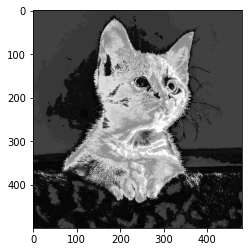

In [62]:
res = np.round(hist2[whole // 4]).astype(np.uint8)
show(res)

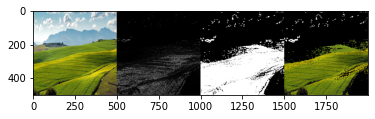

In [64]:
## 彩色图

whole = cv.imread("pic/grass500x500.jpg")
part  = whole[400:500, 100:200, :]

whole_hsv = cv.cvtColor(whole, cv.COLOR_BGR2HSV)
part_hsv = cv.cvtColor(part, cv.COLOR_BGR2HSV)

part_hist = cv.calcHist([part_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# print(shore_hist.max())
# 把频次转换到0-255之间
cv.normalize(part_hist, part_hist, 0, 255, cv.NORM_MINMAX)
dst = cv.calcBackProject([whole_hsv], [0,1], part_hist, [0, 180, 0, 256], 1) # scale把dst整体乘scale再截断

dst3 = cv.merge([dst, dst, dst])
# 卷积
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
dst = cv.filter2D(dst, -1, disc)

_, thresh = cv.threshold(dst, 100, 255, 0)
thresh = cv.merge((thresh, thresh, thresh))
res = cv.bitwise_and(whole, thresh)

show(np.hstack([whole, dst3, thresh, res]))

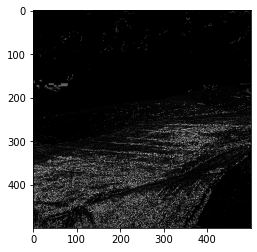

In [88]:
whole = cv.imread("pic/grass500x500.jpg")
part  = whole[400:500, 100:200, :]

whole_hsv = cv.cvtColor(whole, cv.COLOR_BGR2HSV)
part_hsv = cv.cvtColor(part, cv.COLOR_BGR2HSV)

part_hist = cv.calcHist([part_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
part_hist = cv.normalize(part_hist, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

dst = part_hist[whole_hsv[:,:,0], whole_hsv[:,:,1]]

show(dst)

In [111]:
A = img[:20, 0:20]
B = img[100:120, 100:120]

In [112]:
Ax = cv.Sobel(A, cv.CV_64F, 1, 0)
Ay = cv.Sobel(A, cv.CV_64F, 0, 1)

Bx = cv.Sobel(B, cv.CV_64F, 1, 0)
By = cv.Sobel(B, cv.CV_64F, 0, 1)

Ar = np.sqrt(Ax**2 + Ay**2)
Br = np.sqrt(Bx**2 + By**2)

up = (Ax * Bx) + (Ay * By)
down = Ar * Br

(up[up != 0] / down[up != 0]).mean()

0.18246527431204382

In [114]:
def get_xy_derivative(img):
    Gx = cv.Sobel(img, cv.CV_64F, 1, 0)
    Gy = cv.Sobel(img, cv.CV_64F, 0, 1)
    return Gx, Gy

def get_score(Ax, Ay, Bx, By):
    Ar = np.sqrt(Ax**2 + Ay**2)
    Br = np.sqrt(Bx**2 + By**2)

    up = (Ax * Bx) + (Ay * By)
    down = Ar * Br
    
    res = (up[up != 0] / down[up != 0]).mean()
    return res

In [147]:
eagle = cv.imread("pic/eagle500x500.jpg", 0)
eagle = cv.resize(eagle, (100,100))
sh, sw = eagle.shape

mouth = cv.imread("pic/eagle_mouth.jpg", 0)
mouth = cv.resize(mouth, (25, 25))

eagle = cv.imread("pic/hearts200x133.jpg", 0)
# whole2 = whole.copy()

mouth = eagle[36:75, 25:63]

sh, sw = eagle.shape
th, tw = mouth.shape

res = np.zeros_like(eagle, dtype=np.float64)

Ax = cv.Sobel(mouth, cv.CV_64F, 1, 0)
Ay = cv.Sobel(mouth, cv.CV_64F, 0, 1)

Cx = cv.Sobel(eagle, cv.CV_64F, 1, 0)
Cy = cv.Sobel(eagle, cv.CV_64F, 0, 1)

In [148]:
%%time

# 375x375 = 140625
for i in range(sh-th):
    for j in range(sw-tw):
        Bx = Cx[i:i+th, j:j+tw]
        By = Cy[i:i+th, j:j+tw]
#         print((i,j),Ax.shape, Ay.shape, Bx.shape, By.shape)
        score = get_score(Ax, Ay, Bx, By)
        res[i,j] = score

Wall time: 753 ms


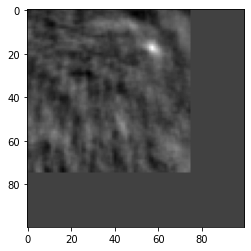

In [135]:
show(res)

In [136]:
minv, maxv, minloc, maxloc = cv.minMaxLoc(res)

top_left = maxloc
bottom_right = (top_left[0] + tw, top_left[1] + th)
cv.rectangle(eagle, top_left, bottom_right, 255, 3)

array([[27, 25, 25, ...,  9,  9,  7],
       [29, 27, 29, ..., 11, 10, 10],
       [30, 31, 29, ..., 11, 11, 10],
       ...,
       [10,  8, 12, ...,  2,  2,  1],
       [10, 10, 14, ...,  1,  1,  2],
       [11, 11, 15, ...,  1,  1,  2]], dtype=uint8)

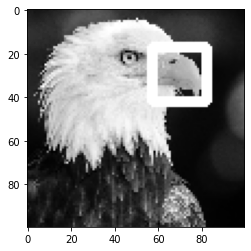

In [137]:
show(eagle)

In [ ]:
S = 